In [96]:
%%file gradient_descent.m
% Function_Name : gradient_descent
% author :
    % Han Seokhee(2013130874)
    % Chung Hyelee(2017130776)
    % Hwang Jongho(2018320177)
% < Explantion for the script >
    % It gets function and derivative function as input
    % AND outpus its 

function [xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, xstart, lambda, tolerance, maxiterations)
    % additional argument x,y,z for convergence observation.
    
    % set initial iteration number
    iter = 1;
    
    % observation-purpose arrays
    x = [];
    y = [];
    z = [];
    
    % set the starting point to xoptimal
    xoptimal = xstart; % x is a column vec.
    
    while iter <= maxiterations
        
        % 1). Calculate the gradient at current coordinate
        
        gradient = [g1(xoptimal(1),xoptimal(2)); g2(xoptimal(1),xoptimal(2))];
        
        
        % 2). Update xoptimal with gradient
        
        xoptimal = xoptimal - lambda.*gradient; 
        
        % <extra for the observation of converging trend>
        
        x(end+1) = xoptimal(1);
        y(end+1) = xoptimal(2);
        z(end+1) = f(xoptimal(1),xoptimal(2));
        
        % 3). check if gradient's L2 norm <= totlerance
        % +) if so, get out of while loop
        
        if norm(gradient,2) <= tolerance
            break
        end
        
        % 4). add iteration number for looping
        % +) if now iteration is already maxiter don't add.
        
        if iter == maxiterations
            break
        end
        
        iter = iter + 1 ;  
    end
    
    
    % calculate foptimal using xoptimal & save iter to niterations
    foptimal = f(xoptimal(1), xoptimal(2));
    niterations = iter;

end

Created file '/Users/sucky/Desktop/assignment/gradient_descent.m'.


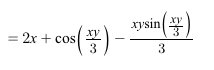

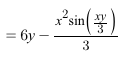

[Original Result : lambda 0.03]

xoptimal =

   -0.5000
    0.0000


foptimal =

   -0.2500


niterations =

   316


[Unable to Converge since lambda 0.34]
xoptimal =

   NaN
   NaN


foptimal =

   NaN


niterations =

        1000


[minimum iteration stepsize]
the_lambda =

    0.2400



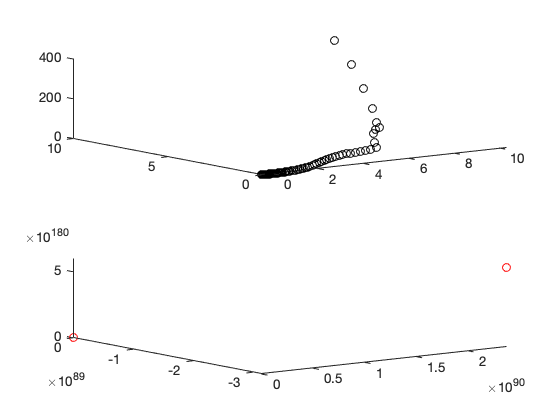

In [112]:
% Basic Clearing
clc; clear all; close all;

% given function f and its parital derivative (g1, g2) with resect to x and y 
f = @(x1,x2) x1.^2 + x1.*cos(x1.*x2/3) + 3*x2.^2;
g1 = @(x1,x2) 2.*x1 + cos(x1.*x2./3) - (x1.*x2.*sin(x1.*x2./3))./3;
g2 = @(x1,x2) 6.*x2 - (x1.^2*sin(x1.*x2./3))./3;


% [ Origninal Result ] 
[xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, [10 10]', 0.03, 1e-7, 1000);
fprintf('[Original Result : lambda 0.03]\n')
xoptimal
foptimal
niterations
subplot(2,1,1);
plot3(x,y,z,'kO','LineWidth',0.001);
hold on


% [ Questions ]
% 1).
% What is the value of lambda up to two digits that will result in non-convergence?
% Try this out yourself and insert value of lambda into the script.
% [Answer] : If it's up to 2 digits, from about < Lambda = 0.34>, It does not converge.

[xoptimal, foptimal, niterations, x, y, z] = gradient_descent(f, g1, g2, [10 10]', 0.34, 1e-7, 1000);
fprintf('\n[Unable to Converge since lambda 0.34]')
xoptimal
foptimal
niterations
subplot(2,1,2);
plot3(x,y,z,'rO','LineWidth',0.1);


% 2).
% What is the value of lambda that has the minimum number of steps in order to reach the minimum point?
% Try this out yourself and insert the value of lambda into the script.
% [Answer] At Lambda = 0.24
candidate_stepsize = [];
candidate_iteration = [];
for i = [0.18:0.01:0.33]
    [~, ~, niterations, ~, ~, ~] = gradient_descent(f, g1, g2, [10 10]', i, 1e-7, 1000);
    candidate_stepsize(end+1) = i;
    candidate_iteration(end+1) = niterations;
end
fprintf('\n[minimum iteration stepsize]')
the_lambda = candidate_stepsize(candidate_iteration == min(candidate_iteration))


In [63]:
%%file gradient_descent.m

function [xoptimal,foptimal,niterations] = gradient_descent(f,g1,g2,xstart,lambda,tolerance,maxiterations)
   
    x=xstart;
    niterations=0;
for i = 1:maxiterations
        
        x=x-lambda*[g1(x(1),x(2)); g2(x(1),x(2))];
        niterations=niterations+1;
        if((g1(x(1),x(2))^2+g2(x(1),x(2))^2).^1/2 <= tolerance )
            break;
        end
    xoptimal=x;
foptimal=f(xoptimal(1),xoptimal(2));

end
end

Created file '/Users/sucky/Desktop/assignment/gradient_descent.m'.


In [64]:
% Clear workspace, output window and close all the figures.
clc; clear all; close all;

f = @(x1,x2) x1.^2 + x1.*cos(x1.*x2/3) + 3*x2.^2;
xstart = [10 10]'; lambda = 0.03; tolerance = 1e-7; maxiter =1000;
g1 = @(x1,x2) x1.*2 + cos(x1.*x2/3) - x1.*sin(x1.*x2/3).*x2/3;
g2 = @(x1,x2) -x1.*sin(x1.*x2/3).*x1/3 +x2.*6;

[xoptimal, foptimal, niterations] = gradient_descent(f,g1,g2,xstart,lambda,tolerance,maxiter)
min =niterations;
minlamb=0;
for lambda=0:0.01:1
lambda
[xoptimal, foptimal, niterations] = gradient_descent(f,g1,g2,xstart,lambda,tolerance,maxiter)
if niterations<min
    min= niterations;
    minlamb=lambda;
end
end
min
minlamb

%lambda should be less than 0.34 
% fastest lambda 0.23, 18 iterations


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   180


xoptimal =

    10
    10


foptimal =

  396.6029


niterations =

        1000


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   560


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   272


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   180


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   132


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

   104


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

    88


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

    74


xoptimal =

   -0.4998
    0.0000


foptimal =

   -0.2500


niterations =

    67


xoptimal =

   -0.4998
   -0.0000


foptimal =

   -0.2500


niterations =

    57


xoptimal =

   -0.4997
    0.0000


foptimal =

   -0.2500


niter

In [ ]:


% Basic clearing

In [ ]:
% Script_Name   : testDerivative.m
% Assignment    : Assignment2, Part1
% Explanation   : Tests instances of function derivatives
% Author        : 2013130874 Han Seok He
%               : 2017130776 CHUNG Hyelee
%               : 2018320177 Hwang Jongho